In [1]:
!pip install tensorflow==2.12.0
!pip install scikit-learn


In [2]:
!pip install opencv-python
!pip install mediapipe --upgrade
!pip install matplotlib

2.Keypoints using MP heulistics

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, holistic):
    # Convert image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Set image to non-writeable
    image.flags.writeable = False
    
    # Make prediction
    results = holistic.process(image)
    
    # Set image to writeable
    image.flags.writeable = True
    
    # Convert image back to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )


In [8]:
# Initialize VideoCapture
cap = cv2.VideoCapture(0)

# Initialize MediaPipe holistic model
with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()
        if not ret:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release the VideoCapture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

AttributeError: module 'mediapipe.python.solutions.holistic' has no attribute 'FACE_CONNECTIONS'

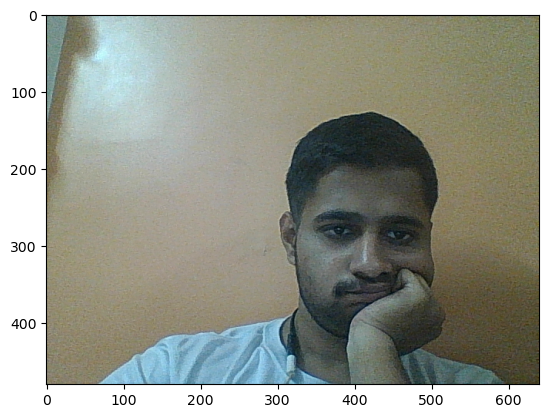

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3.Extract keypoints value 

In [8]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [9]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [10]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
print(results.face_landmarks)

landmark {
  x: 0.66154116
  y: 0.74614817
  z: -0.028561803
}
landmark {
  x: 0.6638847
  y: 0.6985681
  z: -0.06407676
}
landmark {
  x: 0.6615098
  y: 0.71121913
  z: -0.033133455
}
landmark {
  x: 0.65209484
  y: 0.64175516
  z: -0.051291153
}
landmark {
  x: 0.6642292
  y: 0.68213385
  z: -0.068673365
}
landmark {
  x: 0.6634663
  y: 0.65921104
  z: -0.064615645
}
landmark {
  x: 0.66071016
  y: 0.60360754
  z: -0.03456291
}
landmark {
  x: 0.5724268
  y: 0.5907289
  z: 0.0030934352
}
landmark {
  x: 0.6605134
  y: 0.5666399
  z: -0.026884506
}
landmark {
  x: 0.6611391
  y: 0.5458858
  z: -0.029797953
}
landmark {
  x: 0.66141045
  y: 0.46645248
  z: -0.019074619
}
landmark {
  x: 0.6614025
  y: 0.7525722
  z: -0.026318023
}
landmark {
  x: 0.66066086
  y: 0.755936
  z: -0.022530437
}
landmark {
  x: 0.6598423
  y: 0.7557458
  z: -0.01740984
}
landmark {
  x: 0.66049373
  y: 0.75544894
  z: -0.014816706
}
landmark {
  x: 0.6607302
  y: 0.7591664
  z: -0.017182514
}
landmark {
  x

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [12]:
result_test = extract_keypoints(results)

In [13]:
result_test

array([ 0.6546191 ,  0.68208915, -1.1992476 , ...,  0.        ,
        0.        ,  0.        ])

In [14]:
np.save('0', result_test)

In [15]:
np.load('0.npy')

array([ 0.6546191 ,  0.68208915, -1.1992476 , ...,  0.        ,
        0.        ,  0.        ])

4.Setup folders for collection

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['E', 'J', 'P', 'R'])

# Create the directory if it doesn't exist
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

for action in actions:
    dirmax = 0
    try:
        dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    except ValueError:
        # Handle the case where the directory is empty
        pass
    except FileNotFoundError:
        # Handle the case where the directory doesn't exist
        pass
    
    for sequence in range(1, no_sequences + 1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax + sequence)))
        except FileExistsError:
            # Handle the case where the directory already exists
            pass


In [29]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'MP_Data\\0'

Collect keypoints and values for training and testing

In [455]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(1, 31):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [456]:
cap.release()
cv2.destroyAllWindows()

Preprocess data and create labels and features

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [18]:
label_map = {label:num for num, label in enumerate(actions)}

In [19]:
label_map

{'E': 0, 'J': 1, 'P': 2, 'R': 3}

In [20]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [21]:
np.array(sequences).shape

(120, 30, 1662)

In [22]:
np.array(labels).shape

(120,)

In [23]:
X = np.array(sequences)

In [24]:
X.shape

(120, 30, 1662)

In [25]:
y = to_categorical(labels).astype(int)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(114, 30, 1662)
(6, 30, 1662)
(114, 4)
(6, 4)


Build and Train LSTM neural network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [29]:
log_dir = os.path.join('Logs')
os.makedirs(log_dir, exist_ok=True)  # This line creates the directory if it doesn't exist
tb_callback = TensorBoard(log_dir=log_dir)

In [30]:
# Define the input shape
num_features = 1662
input_shape = (sequence_length, num_features)  # You need to define num_features based on your data

# Define the number of classes
num_classes = len(actions)

# Create the sequential model
model = Sequential()

# Define the input shape
sequence_length = 30  # Define your sequence length based on your data

# Add the first LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=True, input_shape=input_shape))
model.add(Dropout(0.2))  # Add dropout here

# Add the second LSTM layer
model.add(LSTM(units=128, return_sequences=True))

# Add the third LSTM layer
model.add(LSTM(units=64, return_sequences=False))

# Add a Dense layer with relu activation
model.add(Dense(64, activation='relu'))

# Add another Dense layer with relu activation
model.add(Dense(32, activation='relu'))

# Add the output layer with softmax activation
model.add(Dense(num_classes, activation='softmax'))

In [219]:
res = (0, 0.9, 0.1, 0.1, 0.2, 0.3, .4, .5, .7, .8, .8, .9, 1, .1, .2, .3, .4, .5, .6, .6, .7, .7, .8)

In [220]:
actions[np.argmax(res)]

'M'

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
4/4 [==============================] - 16s 154ms/step - loss: 1.4057 - accuracy: 0.2368
Epoch 2/2000
4/4 [==============================] - 1s 140ms/step - loss: 1.3795 - accuracy: 0.2895
Epoch 3/2000
4/4 [==============================] - 1s 144ms/step - loss: 1.3501 - accuracy: 0.4211
Epoch 4/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.2663 - accuracy: 0.5000
Epoch 5/2000
4/4 [==============================] - 1s 145ms/step - loss: 1.1564 - accuracy: 0.5088
Epoch 6/2000
4/4 [==============================] - 1s 144ms/step - loss: 1.0985 - accuracy: 0.5000
Epoch 7/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.1729 - accuracy: 0.4123
Epoch 8/2000
4/4 [==============================] - 1s 146ms/step - loss: 0.9603 - accuracy: 0.5000
Epoch 9/2000
4/4 [==============================] - 1s 141ms/step - loss: 0.9830 - accuracy: 0.5789
Epoch 10/2000
4/4 [==============================] - 1s 144ms/step - loss: 0.8885 - accuracy: 0.561

4/4 [==============================] - 1s 158ms/step - loss: 0.3900 - accuracy: 0.7456
Epoch 83/2000
4/4 [==============================] - 1s 142ms/step - loss: 0.4212 - accuracy: 0.7368
Epoch 84/2000
4/4 [==============================] - 1s 144ms/step - loss: 3.7981 - accuracy: 0.2632
Epoch 85/2000
4/4 [==============================] - 1s 143ms/step - loss: 2.0268 - accuracy: 0.2281
Epoch 86/2000
4/4 [==============================] - 1s 146ms/step - loss: 1.9815 - accuracy: 0.2544
Epoch 87/2000
4/4 [==============================] - 1s 140ms/step - loss: 1.8054 - accuracy: 0.2544
Epoch 88/2000
4/4 [==============================] - 1s 142ms/step - loss: 1.6432 - accuracy: 0.2456
Epoch 89/2000
4/4 [==============================] - 1s 145ms/step - loss: 1.5451 - accuracy: 0.2456
Epoch 90/2000
4/4 [==============================] - 1s 148ms/step - loss: 1.4852 - accuracy: 0.2456
Epoch 91/2000
4/4 [==============================] - 1s 141ms/step - loss: 1.4288 - accuracy: 0.2456
Epoc

4/4 [==============================] - 1s 148ms/step - loss: 0.3974 - accuracy: 0.8333
Epoch 163/2000
4/4 [==============================] - 1s 148ms/step - loss: 0.3957 - accuracy: 0.7456
Epoch 164/2000
4/4 [==============================] - 1s 144ms/step - loss: 0.3916 - accuracy: 0.7281
Epoch 165/2000
4/4 [==============================] - 1s 160ms/step - loss: 0.3870 - accuracy: 0.8246
Epoch 166/2000
4/4 [==============================] - 1s 143ms/step - loss: 0.3850 - accuracy: 0.7982
Epoch 167/2000
4/4 [==============================] - 1s 144ms/step - loss: 0.3828 - accuracy: 0.7807
Epoch 168/2000
4/4 [==============================] - 1s 147ms/step - loss: 0.3788 - accuracy: 0.7632
Epoch 169/2000
4/4 [==============================] - 1s 161ms/step - loss: 0.3781 - accuracy: 0.8070
Epoch 170/2000
4/4 [==============================] - 1s 141ms/step - loss: 0.3841 - accuracy: 0.7544
Epoch 171/2000
4/4 [==============================] - 1s 145ms/step - loss: 0.3776 - accuracy: 0.

4/4 [==============================] - 1s 136ms/step - loss: 0.3592 - accuracy: 0.7456
Epoch 243/2000
4/4 [==============================] - 1s 149ms/step - loss: 0.3578 - accuracy: 0.7368
Epoch 244/2000
4/4 [==============================] - 1s 137ms/step - loss: 0.3594 - accuracy: 0.7456
Epoch 245/2000
4/4 [==============================] - 1s 151ms/step - loss: 0.3601 - accuracy: 0.7281
Epoch 246/2000
4/4 [==============================] - 1s 138ms/step - loss: 0.3570 - accuracy: 0.7632
Epoch 247/2000
4/4 [==============================] - 1s 143ms/step - loss: 0.3541 - accuracy: 0.7895
Epoch 248/2000
4/4 [==============================] - 1s 138ms/step - loss: 0.3534 - accuracy: 0.7456
Epoch 249/2000
4/4 [==============================] - 1s 144ms/step - loss: 0.3495 - accuracy: 0.7632
Epoch 250/2000
4/4 [==============================] - 1s 137ms/step - loss: 0.3473 - accuracy: 0.7544
Epoch 251/2000
4/4 [==============================] - 1s 147ms/step - loss: 0.3451 - accuracy: 0.

KeyboardInterrupt: 

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 1

Make prediction

In [34]:
res = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [35]:
actions[np.argmax(res[2])]

'R'

In [36]:
actions[np.argmax(y_test[2])]

'R'

Save weights

In [37]:
model.save('modelEJPR.h5')

In [90]:
del model

In [38]:
model.load_weights('modelEJPR.h5')

evaluation

In [160]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [161]:
yhat = model.predict(X_train)

3/3 [==============================] - 0s 56ms/step


In [162]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [163]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  0],
        [ 0, 29]],

       [[56,  0],
        [ 0, 29]],

       [[58,  0],
        [ 0, 27]]], dtype=int64)

In [164]:
accuracy_score(ytrue, yhat)

1.0

In [66]:
from scipy import stats

In [67]:
# Define colors for visualization
# Define colors for visualization
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117), (117, 16, 245),
          (16, 245, 117), (245, 245, 16), (16, 245, 245), (245, 16, 245), (16, 16, 245),
          (245, 245, 245), (117, 117, 117), (16, 16, 16), (245, 117, 117), (117, 245, 117),
          (117, 117, 245), (245, 16, 16), (16, 245, 16), (16, 16, 245), (245, 245, 16),
          (16, 245, 245), (245, 16, 245), (117, 16, 245), (245, 245, 117), (117, 245, 245),
          (245, 117, 245), (245, 16, 117), (16, 245, 117), (117, 16, 245), (16, 117, 245),
          (117, 245, 16), (245, 117, 16), (16, 117, 245), (245, 16, 117), (117, 16, 245),
          (16, 245, 117), (117, 245, 16)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    if res.ndim == 1:
        for num, prob_float in enumerate(res):
            # Convert prob to integer
            prob_int = int(prob_float * 100)
            cv2.rectangle(output_frame, (0, 60 + num * 40), (prob_int, 90 + num * 40), colors[num], -1)
            cv2.putText(output_frame, f"{actions[num]}", (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    elif res.ndim == 2:
        for i, row in enumerate(res):
            for num, prob_float in enumerate(row):
                # Convert prob to integer
                prob_int = int(prob_float * 100)
                cv2.rectangle(output_frame, (0, 60 + num * 40), (prob_int, 90 + num * 40), colors[num], -1)
                cv2.putText(output_frame, f"{actions[num]} ({i})", (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    else:
        print("Error: Unexpected shape of res:", res.shape)
    return output_frame


In [68]:
print("Shape of res:", res.shape)
print("Data type of res:", res.dtype)

Shape of res: (6, 4)
Data type of res: float32


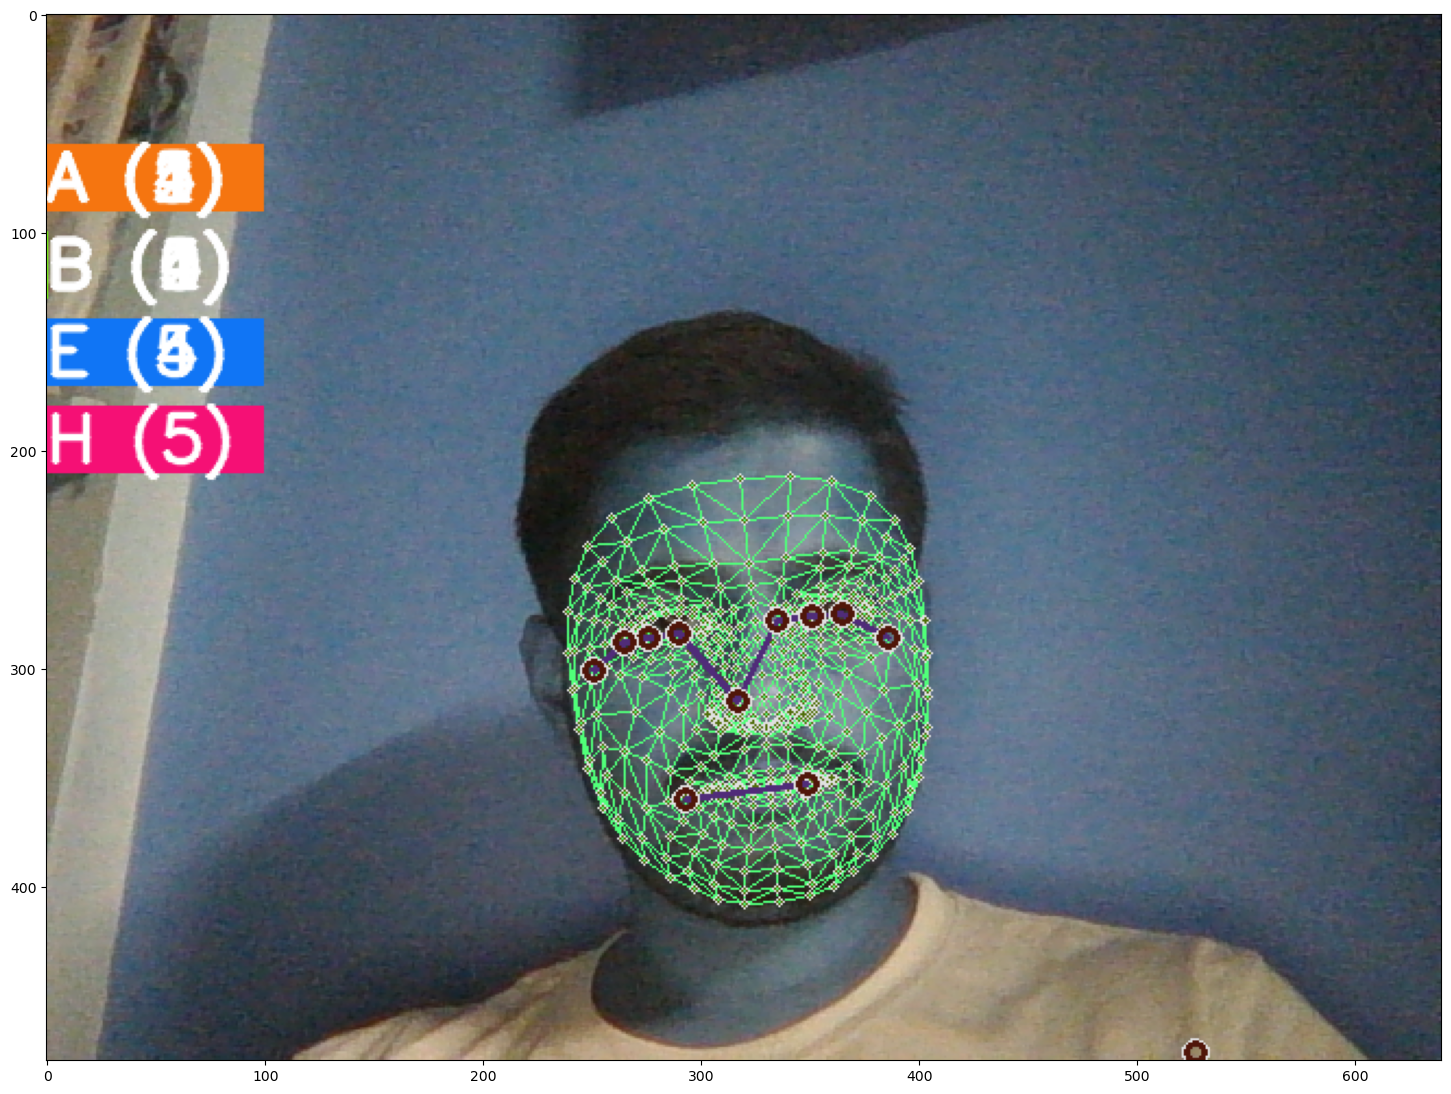

In [69]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [1]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [118]:
cap.release()
cv2.destroyAllWindows()

In [56]:
import numpy as np
import cv2
import mediapipe as mp
from tensorflow.keras.models import load_model

# Function to preprocess landmarks
def preprocess_landmarks(landmarks):
    # Perform any preprocessing required for your model
    # For example, scaling, normalization, etc.
    return landmarks

# Load the trained LSTM model
model = load_model('final1.h5')  # Change the filename if necessary

# Initialize MediaPipe Holistic model
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Function to apply MediaPipe holistic landmarks to video input and make predictions
def predict_hand_signs():
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert the frame to RGB
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Use MediaPipe to detect holistic landmarks
        results = holistic.process(rgb_frame)
        
        # Check if hand landmarks are detected
        if results.left_hand_landmarks or results.right_hand_landmarks:
            # Use the first detected hand if available
            if results.left_hand_landmarks:
                hand_landmarks = results.left_hand_landmarks
            else:
                hand_landmarks = results.right_hand_landmarks
            
            # Convert landmarks to numpy array
            landmarks = np.array([[landmark.x, landmark.y, landmark.z] for landmark in hand_landmarks.landmark])
            
            # Preprocess landmarks
            processed_landmarks = preprocess_landmarks(landmarks)
            
            # Reshape landmarks array according to your model input shape
            # For example, if your model input shape is (sequence_length, num_features)
            # and sequence_length is 100 and num_features is 3 (x, y, z coordinates), you can reshape like this:
            processed_landmarks = processed_landmarks.reshape(1, 21, 3)  # Adjust according to your model
            
            # Make prediction using the loaded model
            prediction = model.predict(processed_landmarks)
            
            # Get the predicted hand sign
            predicted_sign = chr(65 + np.argmax(prediction))  # Assuming A-Z classes
            
            # Display the predicted sign
            cv2.putText(frame, predicted_sign, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        # Display the frame
        cv2.imshow('Hand Sign Prediction', frame)
        
        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()

# Call the function to start prediction
predict_hand_signs()


ValueError: in user code:

    File "D:\anaconda3\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "D:\anaconda3\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\anaconda3\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "D:\anaconda3\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "D:\anaconda3\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\anaconda3\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 30, 1662), found shape=(None, 21, 3)


In [54]:
cap.release()
cv2.destroyAllWindows()